In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spam_dataset.csv')
df.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [3]:
df.columns.values.tolist()

['word_freq_make:',
 'word_freq_address:',
 'word_freq_all:',
 'word_freq_3d:',
 'word_freq_our:',
 'word_freq_over:',
 'word_freq_remove:',
 'word_freq_internet:',
 'word_freq_order:',
 'word_freq_mail:',
 'word_freq_receive:',
 'word_freq_will:',
 'word_freq_people:',
 'word_freq_report:',
 'word_freq_addresses:',
 'word_freq_free:',
 'word_freq_business:',
 'word_freq_email:',
 'word_freq_you:',
 'word_freq_credit:',
 'word_freq_your:',
 'word_freq_font:',
 'word_freq_000:',
 'word_freq_money:',
 'word_freq_hp:',
 'word_freq_hpl:',
 'word_freq_george:',
 'word_freq_650:',
 'word_freq_lab:',
 'word_freq_labs:',
 'word_freq_telnet:',
 'word_freq_857:',
 'word_freq_data:',
 'word_freq_415:',
 'word_freq_85:',
 'word_freq_technology:',
 'word_freq_1999:',
 'word_freq_parts:',
 'word_freq_pm:',
 'word_freq_direct:',
 'word_freq_cs:',
 'word_freq_meeting:',
 'word_freq_original:',
 'word_freq_project:',
 'word_freq_re:',
 'word_freq_edu:',
 'word_freq_table:',
 'word_freq_conference:',
 '

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

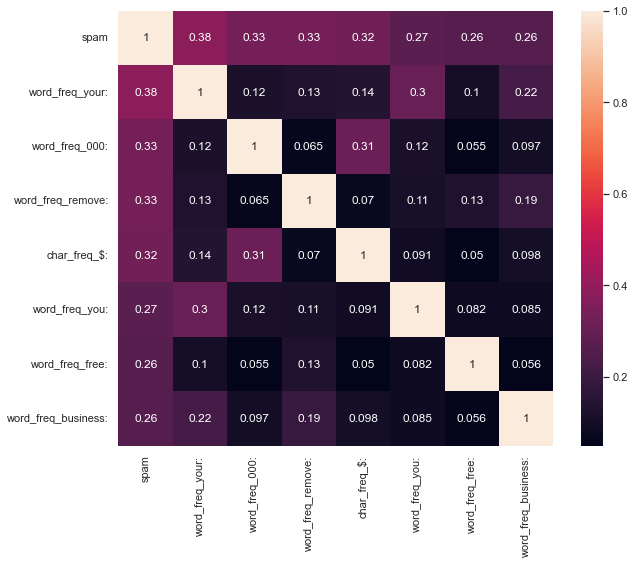

In [15]:
# 相关性分析
# 数值型数据分析
corrmat = df.corr()
k = len(corrmat[corrmat['spam'] > 0.25].index)
# 获取前k个重要的特征名
cols = corrmat.nlargest(k,'spam')['spam'].index.tolist()
# 计算该k个特征的相关系数
cm = df[cols].corr()
# 画出可视化热土
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,square=True)
plt.show()

#word_freq_your/word_freq_000/word_freq_remove 这三个自变量是垃圾邮件模型最重要的预测因子，因为这三个的正相关性最高

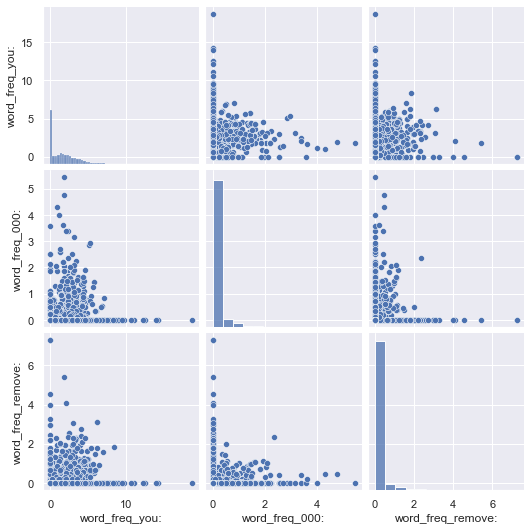

In [6]:
# 特征画多变量图
sns.set()
area = ['word_freq_you:','word_freq_000:','word_freq_remove:']
sns.pairplot(df[area], size = 2.5)
plt.show()

4、xxxxxxx

5、xxxxxxxxxx

6、xxxxxxxxx

7、xxxxxxxx

In [7]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import numpy as np

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[area],df['spam'], random_state=42,test_size=0.3) 
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(X_train)
test_ss_x = ss.transform(X_test)

In [9]:
#创建cart分类树 决策树
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(train_ss_x,y_train) 
pred_label = clf.predict(test_ss_x)
print('决策树 准确率:%0.4lf' % accuracy_score(y_test,pred_label))
print('决策树 交叉验证准确率 %.4lf' % np.mean(cross_val_score(clf,train_ss_x,y_train)))

决策树 准确率:0.7857
决策树 交叉验证准确率 0.8102


In [10]:
#随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# 创建随机森林分类器 n_estimators随机森林中决策树的个数，n_jobs表示拟合和预测时CPU的核数
forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
#对数据进行分类
forest.fit(train_ss_x,y_train)
# 用测试集做预测
prediction = forest.predict(test_ss_x)
print('随机森林 准确率：%0.4lf'%metrics.accuracy_score(prediction,y_test))
print('随机森林 交叉验证准确率 %.4lf' % np.mean(cross_val_score(forest,train_ss_x,y_train)))

随机森林 准确率：0.7857
随机森林 交叉验证准确率 0.8099


#要构造一个随机森林模型，第一步是确定森林中数的数目，通过模型的进行调节，n_estimators越大越好，但占用的内存与训练和预测
#的时间也会相应增长，且边际效益是递减的，所以要在可承受的内存/时间内选取尽可能大的n_estimators
#通过运行时长以及自身电脑的内存，最终选择了1000个n_estimators来作为森林的数目，这样既保证了运行的效率，又有着较高的准确率

In [11]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size=30)
knn.fit(train_ss_x,y_train)
predict_y = knn.predict(test_ss_x)
print('KNN 准确率:%.4lf' % accuracy_score(y_test,predict_y))
print('KNN 交叉验证准确率 %.4lf' % np.mean(cross_val_score(knn,train_ss_x,y_train)))

KNN 准确率:0.7922
KNN 交叉验证准确率 0.8168


#n_neighbors既表示KNN中的K值，代表的是邻居的数量，K值如果比较小，会造成过拟合。如果K值比较大，无法将无知物体分类出来
#weights=uniform代表所有邻居的权重相同
#weights=distance，代表权重是距离的倒数，既与距离成反比
#自定义函数，你可以自定义不同距离所对应的权重。大部分情况下不需要自己定义函数
#algorithm用来规定计算邻居的方法
#algorithm=auto，根据数据的情况自动选择适合的算法，默认情况选择auto
#algorithm=kd_tree也叫KD树，是多维空间的数据结构，方便对关键数据进行检索，不过KD树适用于维度少的情况，一般维数不超过20，如果超过20效率会下降
#algorithm=ball_tree也叫球树，它和KD树一样都是多维空间的数据结果，不同于KD树，球树更适用于维度大的情况
#algorithm=brute也叫暴力搜索，它和KD树不同的地方在于采用的是线性扫描，而不是通过构造树结构进行快速检索，当训练集大的时候，效率比较低
#leaf_size代表构造KD树或者球树的叶子树，默认为30，leaf_size会影响到树的构造和搜索速度

In [12]:
from sklearn import svm

In [13]:
# 创建SVM分类器
model = svm.LinearSVC(C=2.0)
# 用训练集做训练
model.fit(train_ss_x,y_train)
# 用测试集做预测
prediction1=model.predict(test_ss_x)
print('SVM 准确率:%.4lf' % accuracy_score(y_test,predict_y))
print('SVM 交叉验证准确率 %.4lf' % np.mean(cross_val_score(model,train_ss_x,y_train)))

SVM 准确率:0.7922
SVM 交叉验证准确率 0.7960


#参数C代表目标函数的惩罚系数，惩罚系数指的是分错样本时，惩罚的程度，默认情况下为1.0，当C越大的时候，分类器的准确性越高，容错率越低，泛化能力变差

12、从上面4个模型来看，最佳模型是KNN模型，因此用KNN添加新的变量，看看能否提高模型的精度

In [16]:
area1 = ['word_freq_you:','word_freq_000:','word_freq_remove:','char_freq_$:','word_freq_you:','word_freq_free:']
X_train, X_test, y_train, y_test = train_test_split(df[area1],df['spam'], random_state=42,test_size=0.3) 
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(X_train)
test_ss_x = ss.transform(X_test)

In [17]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size=30)
knn.fit(train_ss_x,y_train)
predict_y = knn.predict(test_ss_x)
print('KNN 准确率:%.4lf' % accuracy_score(y_test,predict_y))
print('KNN 交叉验证准确率 %.4lf' % np.mean(cross_val_score(knn,train_ss_x,y_train)))

KNN 准确率:0.8566
KNN 交叉验证准确率 0.8640


#精准度得以提高

13、使用最后6个变量重新运行其他模式

In [21]:
area2 = ['char_freq_!:','char_freq_$:','char_freq_#:','capital_run_length_average:','capital_run_length_longest:','capital_run_length_total:']
X_train, X_test, y_train, y_test = train_test_split(df[area2],df['spam'], random_state=42,test_size=0.3) 
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(X_train)
test_ss_x = ss.transform(X_test)

In [22]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(train_ss_x,y_train) 
pred_label = clf.predict(test_ss_x)
print('决策树 准确率:%0.4lf' % accuracy_score(y_test,pred_label))
print('决策树 交叉验证准确率 %.4lf' % np.mean(cross_val_score(clf,train_ss_x,y_train)))

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
forest.fit(train_ss_x,y_train)
prediction = forest.predict(test_ss_x)
print('随机森林 准确率：%0.4lf'%metrics.accuracy_score(prediction,y_test))
print('随机森林 交叉验证准确率 %.4lf' % np.mean(cross_val_score(forest,train_ss_x,y_train)))

knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size=30)
knn.fit(train_ss_x,y_train)
predict_y = knn.predict(test_ss_x)
print('KNN 准确率:%.4lf' % accuracy_score(y_test,predict_y))
print('KNN 交叉验证准确率 %.4lf' % np.mean(cross_val_score(knn,train_ss_x,y_train)))

model = svm.LinearSVC(C=2.0)
model.fit(train_ss_x,y_train)
prediction1=model.predict(test_ss_x)
print('SVM 准确率:%.4lf' % accuracy_score(y_test,predict_y))
print('SVM 交叉验证准确率 %.4lf' % np.mean(cross_val_score(model,train_ss_x,y_train)))

决策树 准确率:0.8436
决策树 交叉验证准确率 0.8460
随机森林 准确率：0.8943
随机森林 交叉验证准确率 0.8894
KNN 准确率:0.8646
KNN 交叉验证准确率 0.8621
SVM 准确率:0.8646
SVM 交叉验证准确率 0.7898


13 我最终选择KNN模型作为我的最终模型，因为这个模型，相对来说较为稳定，无论是之前的测试结果，还是最终的测试结果
#都有着较好准确率，排名也相对靠前

14、目前word_freq_business:并不在我的模型中

In [26]:
area3 = ['word_freq_you:','word_freq_000:','word_freq_remove:','char_freq_$:','word_freq_you:','word_freq_free:','word_freq_business:']
X_train, X_test, y_train, y_test = train_test_split(df[area3],df['spam'], random_state=42,test_size=0.3) 
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(X_train)
test_ss_x = ss.transform(X_test)

In [27]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size=30)
knn.fit(train_ss_x,y_train)
predict_y = knn.predict(test_ss_x)
print('KNN 准确率:%.4lf' % accuracy_score(y_test,predict_y))
print('KNN 交叉验证准确率 %.4lf' % np.mean(cross_val_score(knn,train_ss_x,y_train)))

KNN 准确率:0.8675
KNN 交叉验证准确率 0.8755


#如果我新增一个新的变量，将会提高我的准确率，不过提高的空间不是很大